In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data and Inspect

In [3]:
inputTrip = "Overview"
dataTrip1 = pd.read_xlsx(f"{inputTrip}.xlsx",sep=";", encoding='unicode_escape')
dfTrip1   = pd.DataFrame(dataTrip1)
dfTrip1.head(20)
#col_list = dfTrip1.columns.tolist()
#print(col_list)

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0        0.0              0.0          574.0           0.0               0.00   
1        0.1              0.0          574.0           0.0               0.00   
2        0.2              0.0          574.0           0.0               0.00   
3        0.3              0.0          574.0           0.0               0.00   
4        0.4              0.0          574.0           0.0               0.00   
5        0.5              0.0          574.0           0.0               0.00   
6        0.6              0.0          574.0           0.0               0.00   
7        0.7              0.0          574.0           0.0               0.00   
8        0.8              0.0          574.0           0.0               0.38   
9        0.9              0.0          574.0           0.0               0.12   
10       1.0              0.0          574.0           0.0               0.38   
11       1.1              0.0          574.0           0.0               0.00   
12       1.2              0.0          574.0           0.0               0.00   
13       1.3              0.0          574.0           0.0               0.00   
14       1.4              0.0          574.0           0.0               0.00   
15       1.5              0.0          574.0           0.0               0.00   
16       1.6              0.0          574.0           0.0               0.00   
17       1.7              0.0          574.0           0.0               0.00   
18       1.8              0.0          574.0           0.0               0.23   
19       1.9              0.0          574.0           0.0               0.23   

    Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                               -0.03                           0.0   
1                                0.00                           0.0   
2                               -0.01                           0.0   
3                               -0.03                           0.0   
4                               -0.03                           0.0   
5                               -0.01                           0.0   
6                               -0.01                           0.0   
7                               -0.03                           0.0   
8                               -0.01                           0.0   
9                               -0.01                           0.0   
10                               0.01                           0.0   
11                              -0.02                           0.0   
12                              -0.03                           0.0   
13                              -0.01                           0.0   
14                               0.02                           0.0   
15                               0.00                           0.0   
16                              -0.03                           0.0   
17                              -0.01                           0.0   
18                              -0.03                           0.0   
19                              -0.03                           0.0   

    Battery Voltage [V]  Battery Current [A]  Battery Temperature [°C]  ...  \
0                391.40                -2.20                      21.0  ...   
1                391.40                -2.21                      21.0  ...   
2                391.40                -2.26                      21.0  ...   
3                391.40                -2.30                      21.0  ...   
4                391.40                -2.30                      21.0  ...   
5                391.40                -2.30                      21.0  ...   
6                391.40                -2.30                      21.0  ...   
7                391.40                -2.31                      21.0  ...   
8                391.40                -2.36                      21.0  ...   
9                391

In [4]:
dfTrip1.describe()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  \
count  10090.000000     10090.000000   10090.000000  10090.000000   
mean     504.450000        26.502170     566.791625     26.470424   
std      291.287644        15.497032       5.577563     16.370510   
min        0.000000         0.000000     558.000000      0.000000   
25%      252.225000        15.362500     562.090000     13.550000   
50%      504.450000        29.550000     565.000000     31.100000   
75%      756.675000        38.720000     574.000000     40.357500   
max     1008.900000        53.300000     574.000000     55.900000   

       Motor Torque [Nm]  Longitudinal Acceleration [m/s^2]  \
count       10090.000000                       10090.000000   
mean            8.106545                           0.014246   
std            42.123984                           0.741669   
min           -87.050000                          -2.290000   
25%            -9.157500                          -0.330000   
50%             4.630000                           0.020000   
75%            23.540000                           0.350000   
max           174.420000                           2.790000   

       Regenerative Braking Signal   Battery Voltage [V]  Battery Current [A]  \
count                  10090.000000         10090.000000         10090.000000   
mean                       0.118162           388.483996           -11.953476   
std                        0.322172             2.158318            22.799614   
min                        0.000000           380.420000          -100.700000   
25%                        0.000000           387.190000           -22.197500   
50%                        0.000000           388.540000            -8.570000   
75%                        0.000000           390.000000            -1.990000   
max                        1.000000           394.470000            66.220000   

       Battery Temperature [°C]  ...  AirCon Power [kW]  Heater Signal  \
count              10090.000000  ...       10090.000000        10090.0   
mean                  21.940141  ...           1.610408            1.0   
std                    0.237147  ...           0.340490            0.0   
min                   21.000000  ...           0.400000            1.0   
25%                   22.000000  ...           1.580000            1.0   
50%                   22.000000  ...           1.670000            1.0   
75%                   22.000000  ...           1.760000            1.0   
max                   22.000000  ...           2.520000            1.0   

       Heater Voltage [V]  Heater Current [A]  Ambient Temperature [°C]  \
count             10090.0             10090.0              10090.000000   
mean                  0.0                 0.0                 30.769972   
std                   0.0                 0.0                  1.619032   
min                   0.0                 0.0                 25.500000   
25%                   0.0                 0.0                 30.500000   
50%                   0.0                 0.0                 31.000000   
75%                   0.0                 0.0                 32.000000   
max                   0.0                 0.0                 33.500000   

       Coolant Temperature Heatercore [°C]  \
count                              10090.0   
mean                                   0.0   
std                                    0.0   
min                                    0.0   
25%                                    0.0   
50%                                    0.0   
75%                                    0.0   
max                                    0.0   

       Requested Coolant Temperature [°C]  Coolant Temperature Inlet [°C]  \
count                             10090.0                         10090.0   
mean                                  0.0                             0.0   
std                                   0.0                             0.0   
min                      

Plot some trip properties vs. time

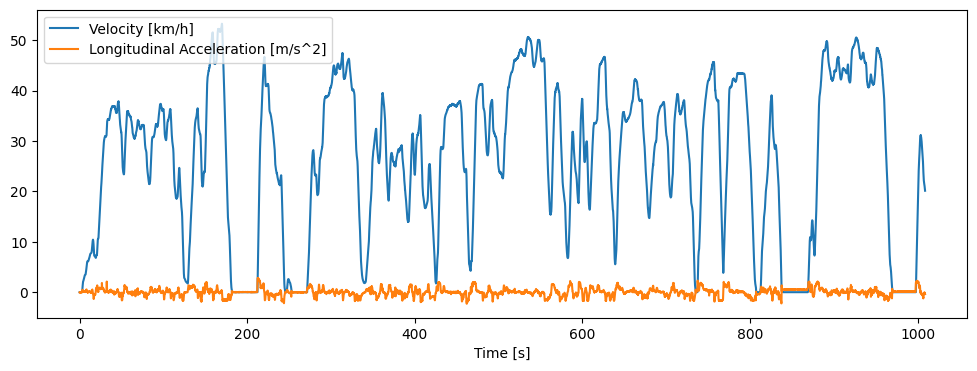

In [5]:
#-Inspect a couple features over time
dfTrip1.plot(x="Time [s]", y=['Velocity [km/h]','Longitudinal Acceleration [m/s^2]'],
        kind="line", figsize=(12, 4)) 
plt.show()

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

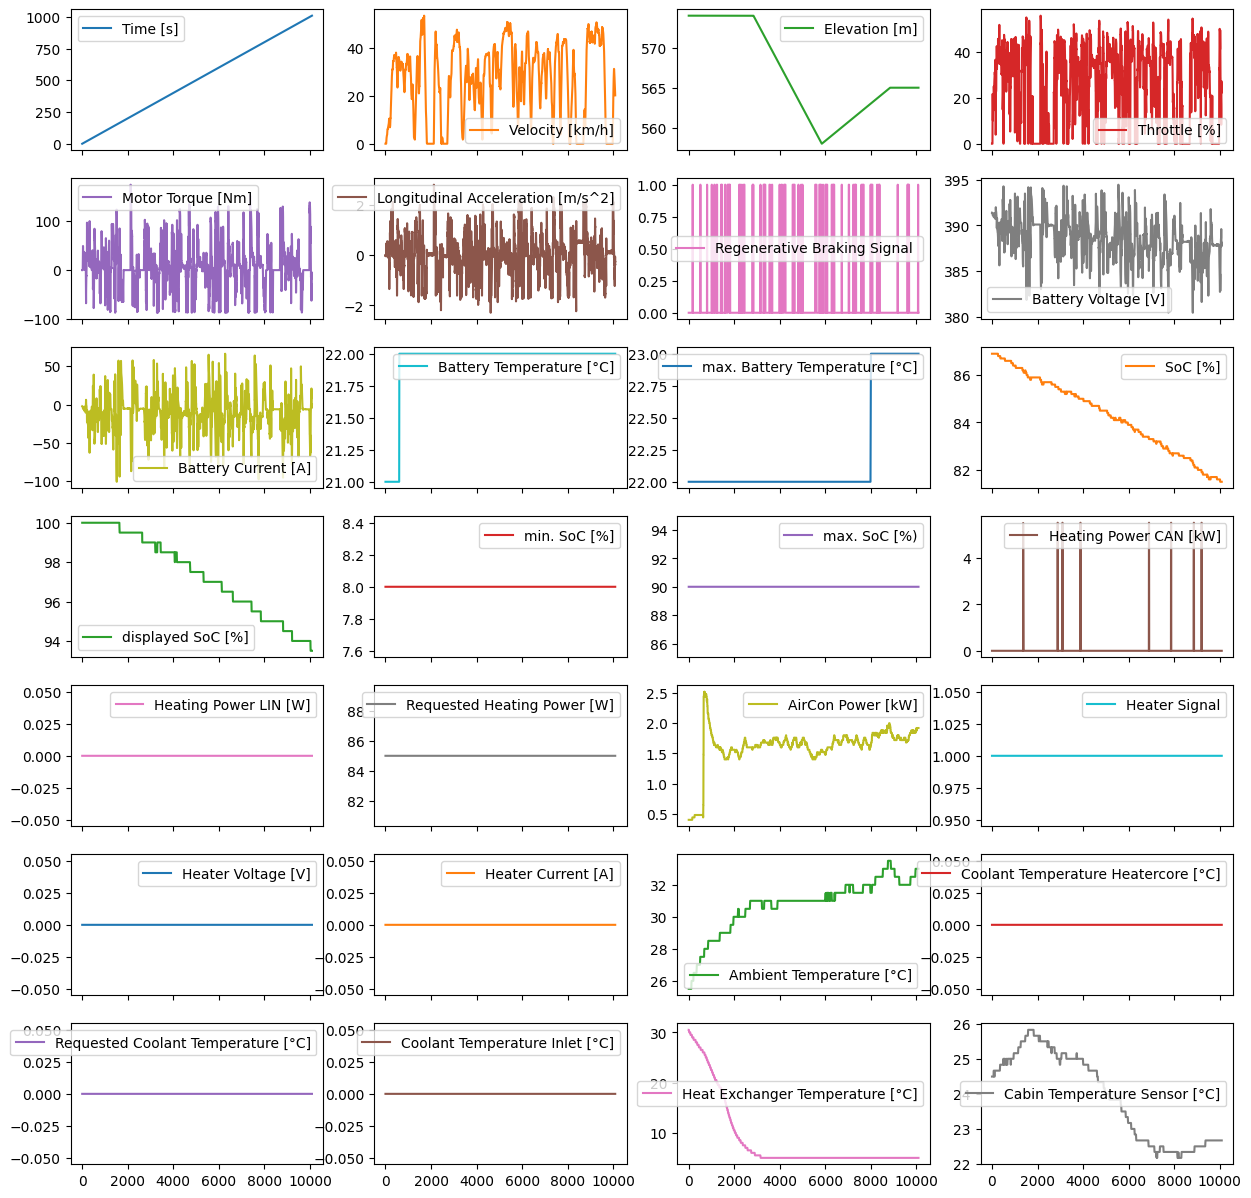

In [6]:
#-Plot all collumns into subplots to display their properties
dfTrip1.plot(subplots=True, layout=(7,4), figsize=(15,15))

Now load all summer trips but make sure that all the datasets are conform with each other

In [7]:
def conform_datasets(nbOfTrips, pathToFiles, col_list=None):
    'Function that looks through the different trips to see if they all'
    'contain the same features. If not, remove those that are not present'
    'everywhere. Otherwise training and inference may not work properly'
    
    dfSummerTrips = []
    if not col_list:
        col_list = []
    inputTripsA = pathToFiles
    #-Loop through all trips and check what data they contain
    for i in range(0,nbOfTrips):
        dataTrip = pd.read_csv(f"{inputTripsA}{(i+1):02}.csv", sep=";", encoding='unicode_escape') 
        dfSummerTrips.append(pd.DataFrame(dataTrip))
        if not col_list: 
            col_list = dfSummerTrips[i].columns.tolist()
        elif set(col_list)!= set(dfSummerTrips[i].columns.tolist()):
            diff = list(set(col_list)-set(dfSummerTrips[i].columns.tolist()))
            for item in diff:
                print(f"Discrepancy with Trip: {(i+1):02}")
                print(f"Removed >>{item}<< from columns list since it is not consistently present for all trips")
                col_list.remove(item)
    
    #-Now loop through the dataframes and remove those columns that are not present everywhere
    for i, trip in enumerate(dfSummerTrips):
        dfSummerTrips[i] = trip[col_list]
    return dfSummerTrips, col_list

In [8]:
#-Load all 32 trips to compare if they have consistent features
pathA = "/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripA"
dfSummerTrips, consistent_cols = conform_datasets(nbOfTrips=32,pathToFiles=pathA)

Discrepancy with Trip: 03
Removed >>Heater Current [A]<< from columns list since it is not consistently present for all trips
Discrepancy with Trip: 03
Removed >>Coolant Temperature Inlet [°C]<< from columns list since it is not consistently present for all trips
Discrepancy with Trip: 03
Removed >>Heater Voltage [V]<< from columns list since it is not consistently present for all trips
Discrepancy with Trip: 03
Removed >>Coolant Temperature Heatercore [°C]<< from columns list since it is not consistently present for all trips
Discrepancy with Trip: 03
Removed >>Heating Power LIN [W]<< from columns list since it is not consistently present for all trips
Discrepancy with Trip: 21
Removed >>Requested Coolant Temperature [°C]<< from columns list since it is not consistently present for all trips


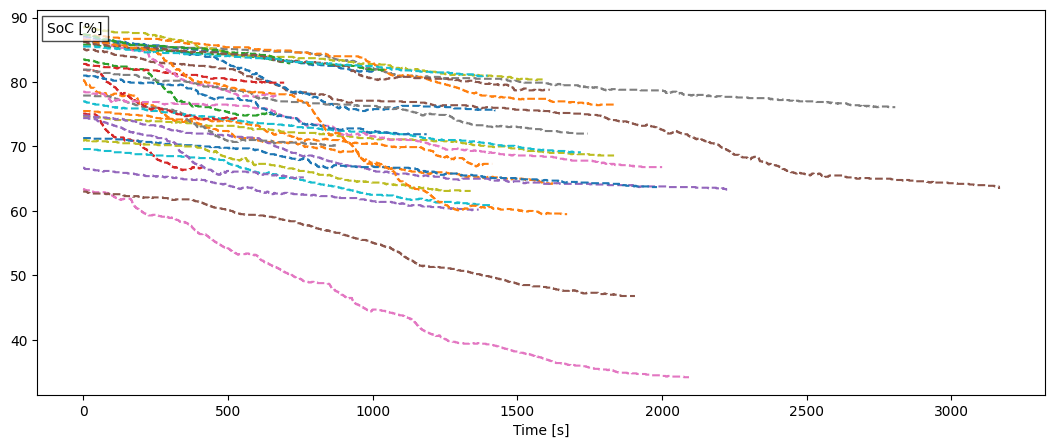

In [9]:
#-Plot SOC developement of all 32 summer trips in one plot
fig, ax = plt.subplots(figsize=(13,5))
for trip in dfSummerTrips:
    trip.plot(x="Time [s]", y=["SoC [%]"], ax=ax, ls="--")
    #dfSummerTrips[i][dfSummerTrips[i]["max. SoC [%)"]>89.7].plot(x="Time [s]", y=["SoC [%]"], ax=ax, ls="--", ylim=(0,100))
    #dfSummerTrips[i][dfSummerTrips[i]["Heater Signal"]==0].plot(x="Time [s]", y=["SoC [%]"], ax=ax, ls="--", ylim=(0,100))
ax.legend().set_visible(False)
ax.text(0.01, 0.97, "SoC [%]", transform=ax.transAxes, fontsize=10, va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

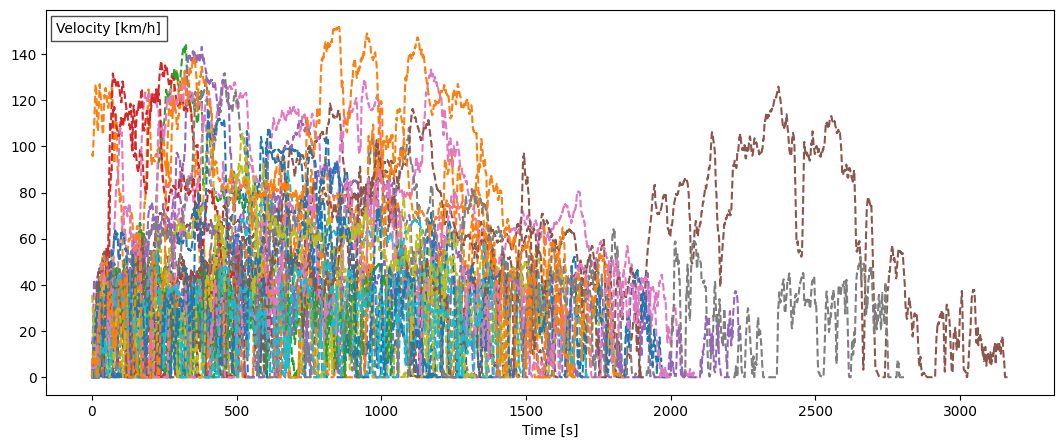

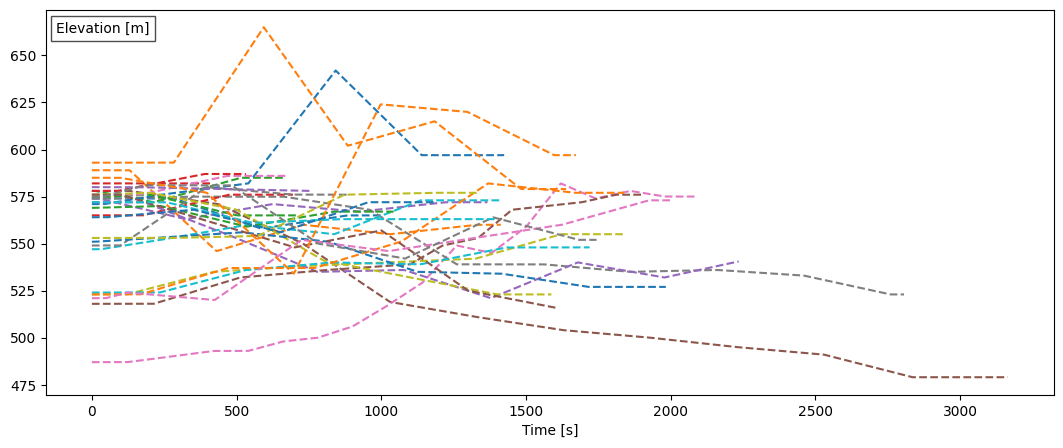

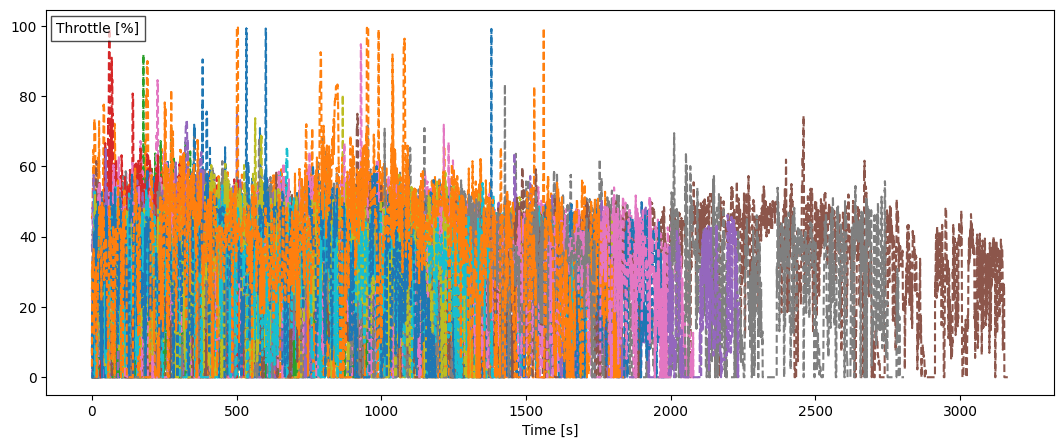

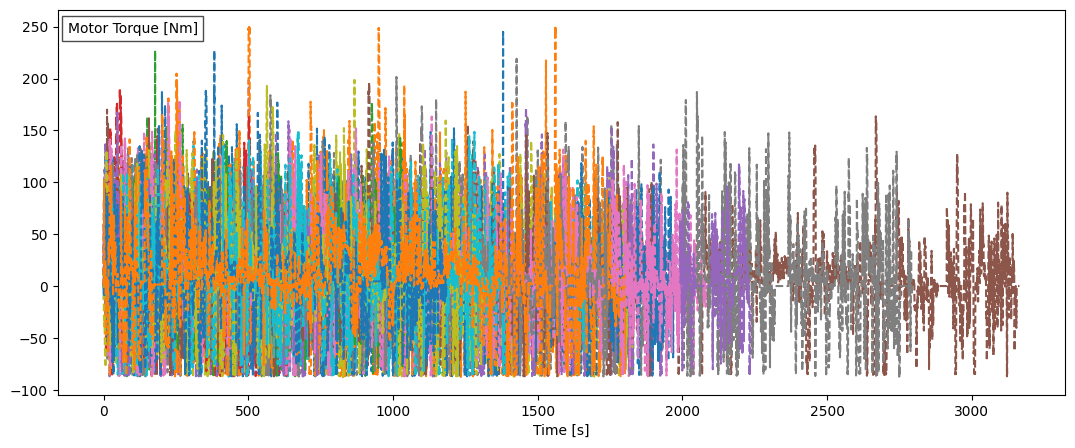

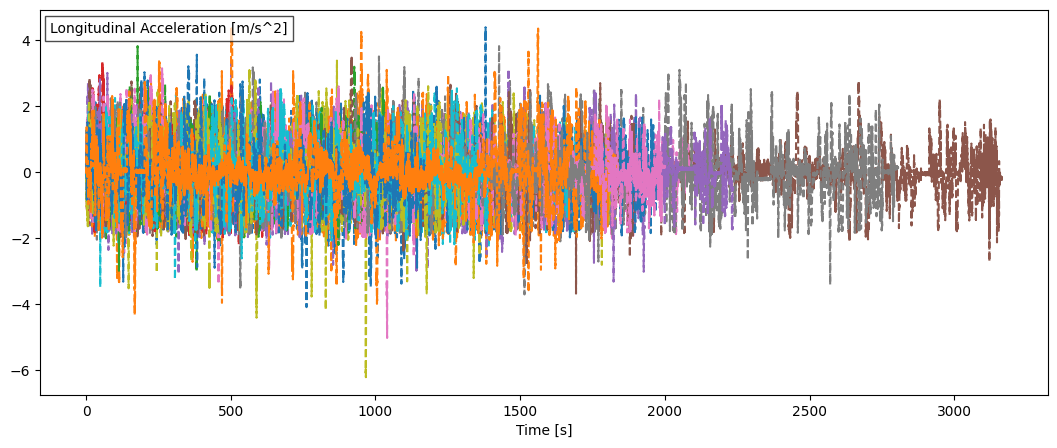

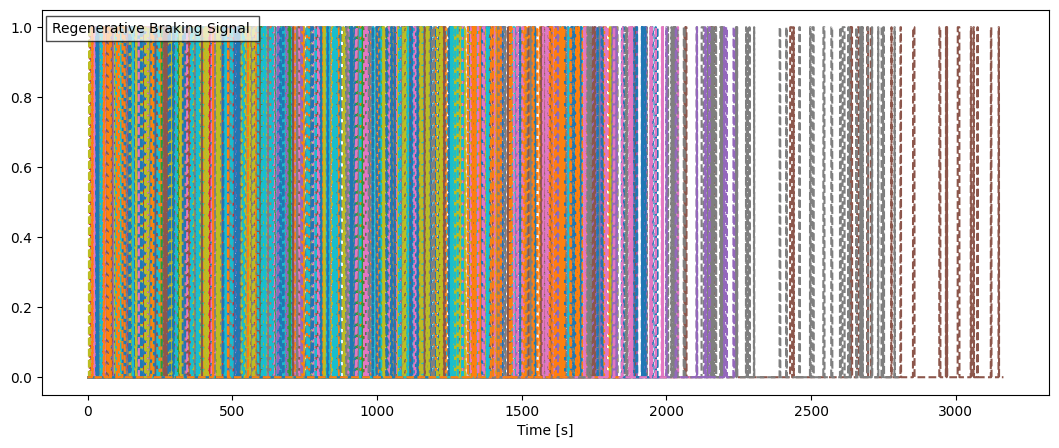

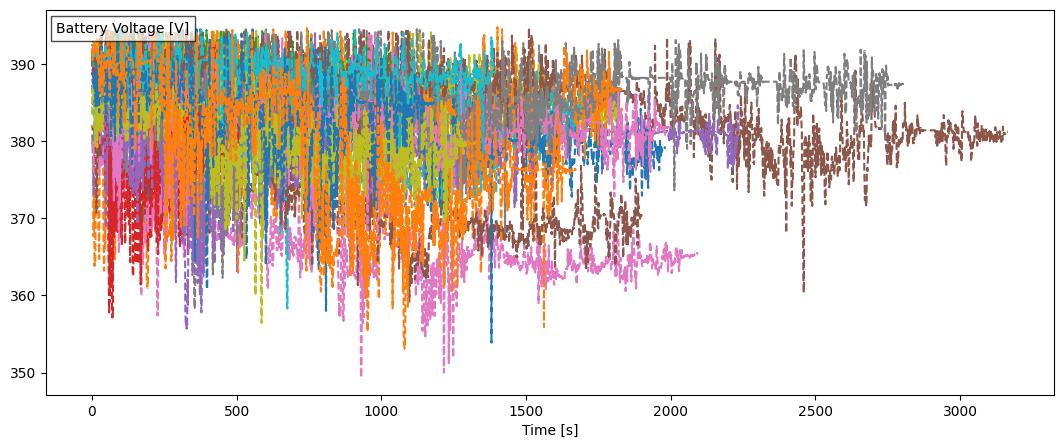

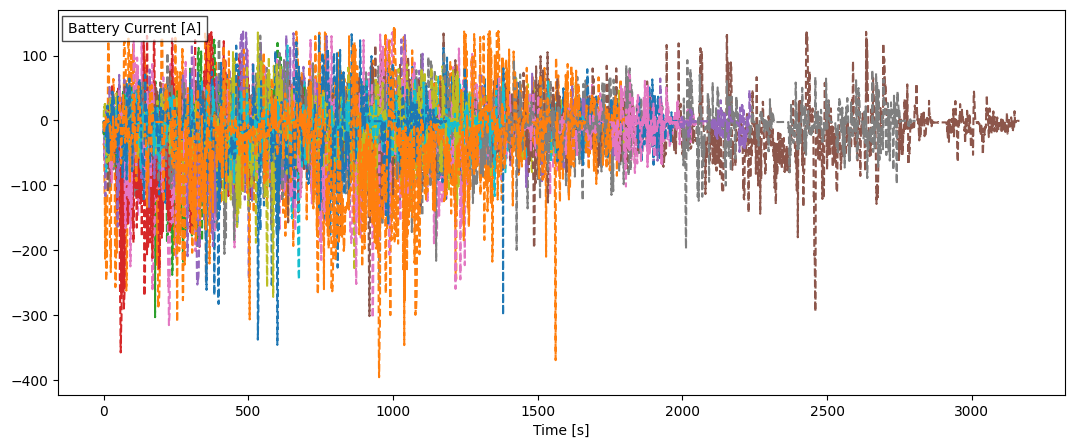

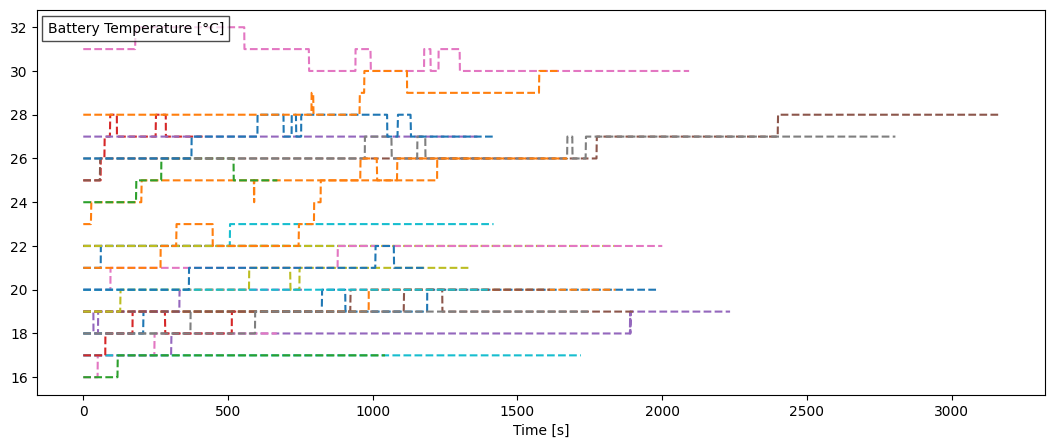

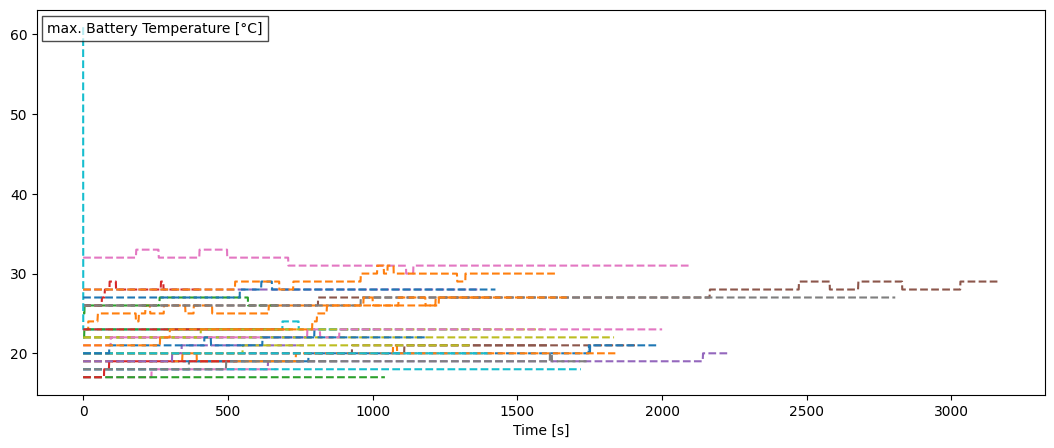

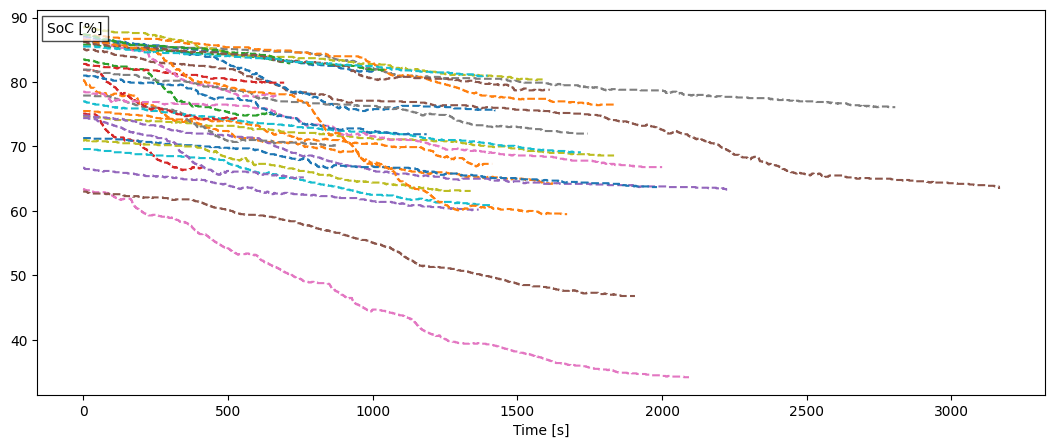

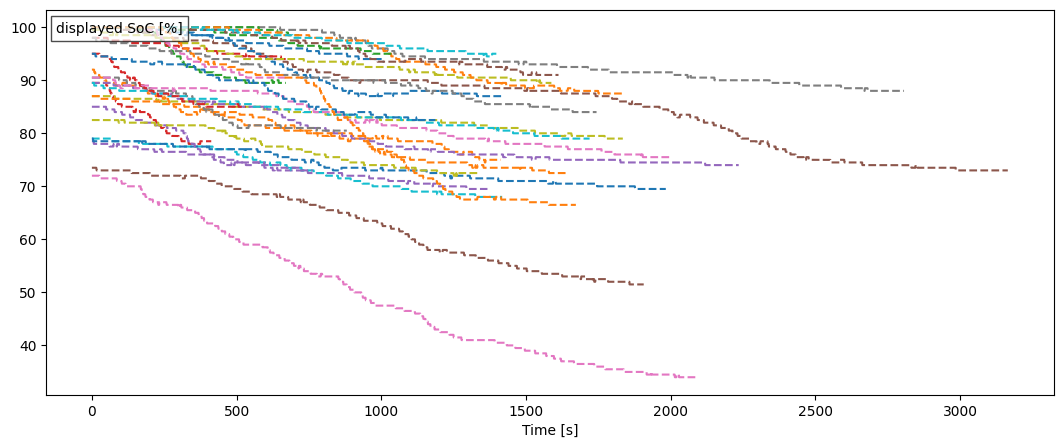

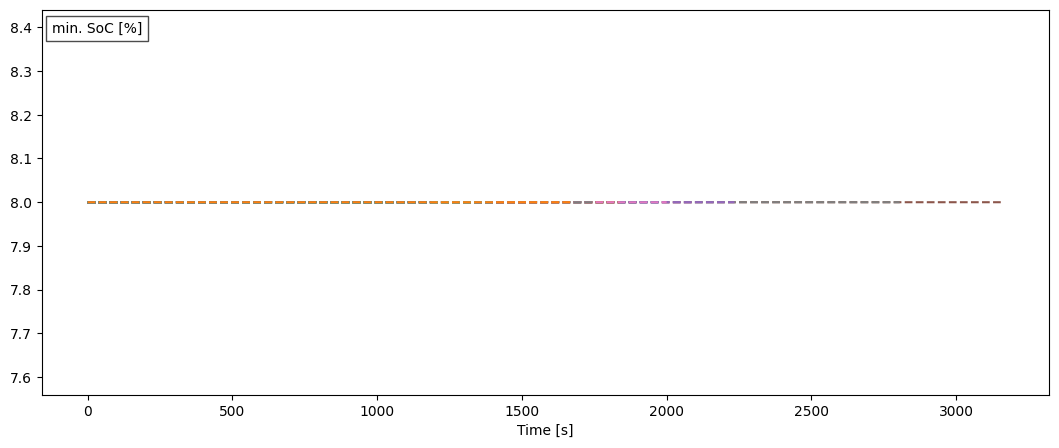

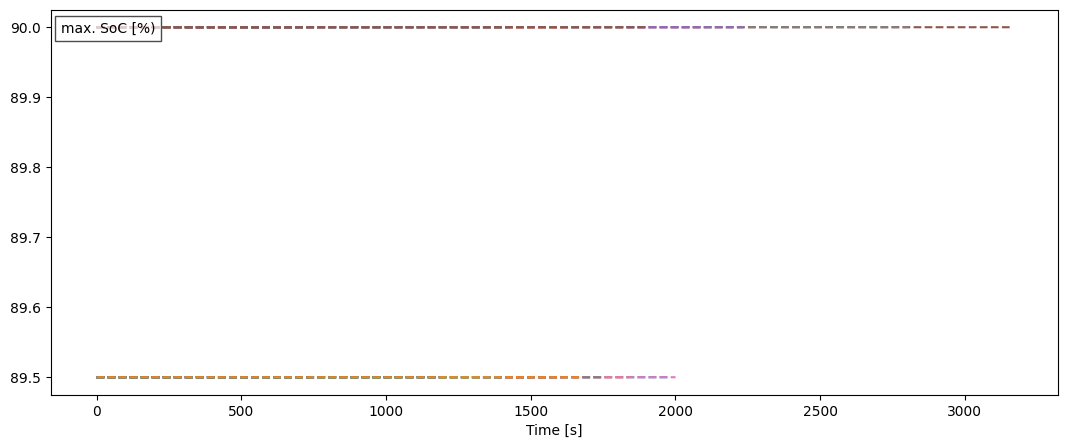

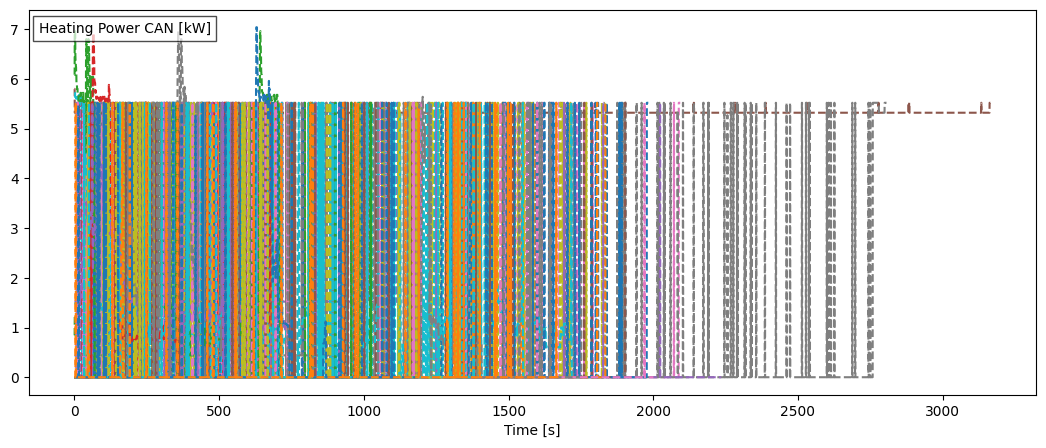

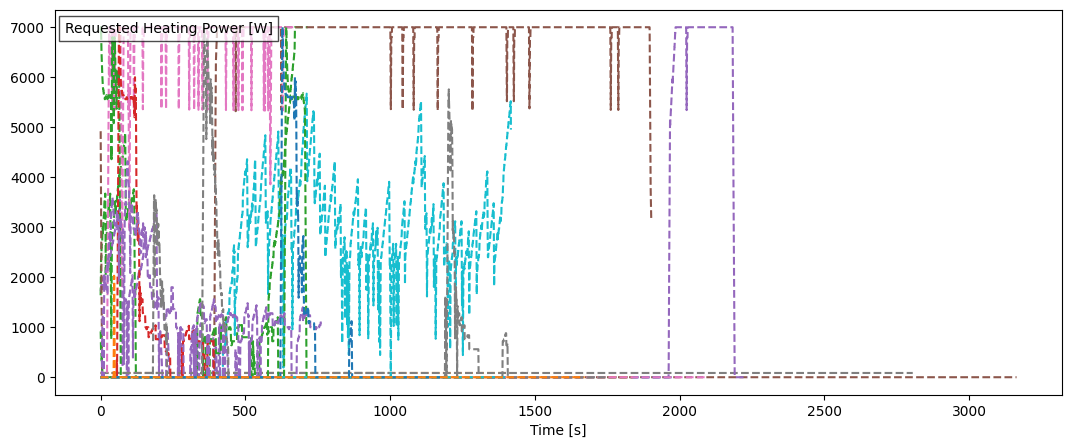

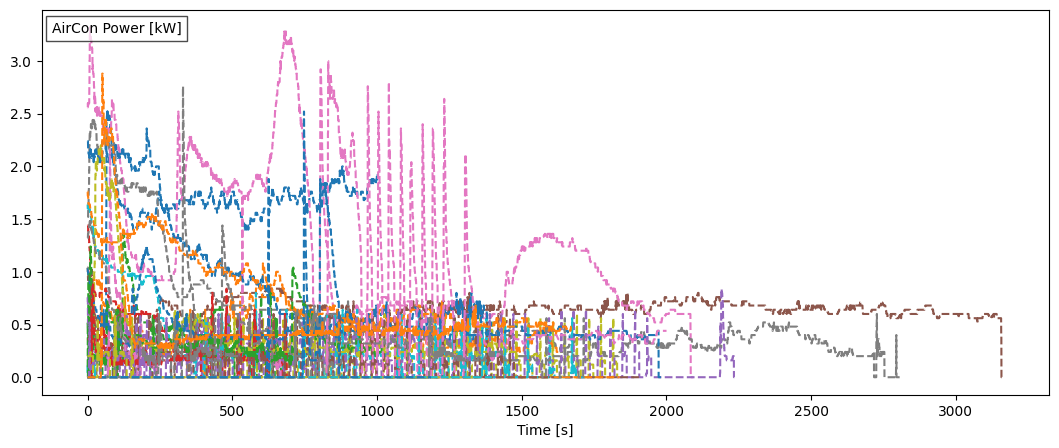

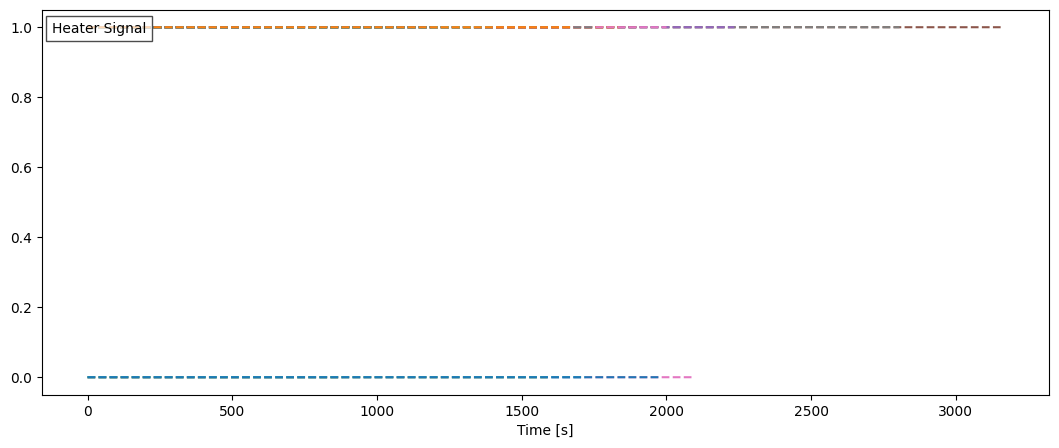

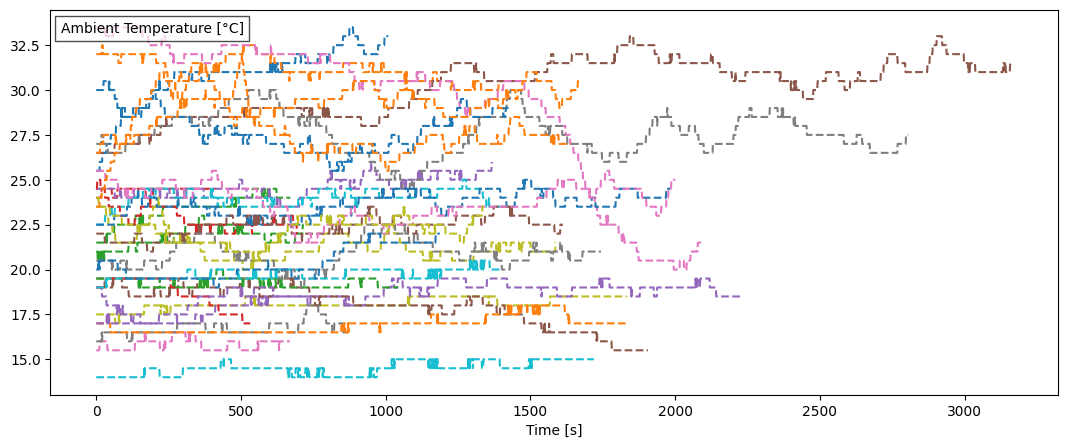

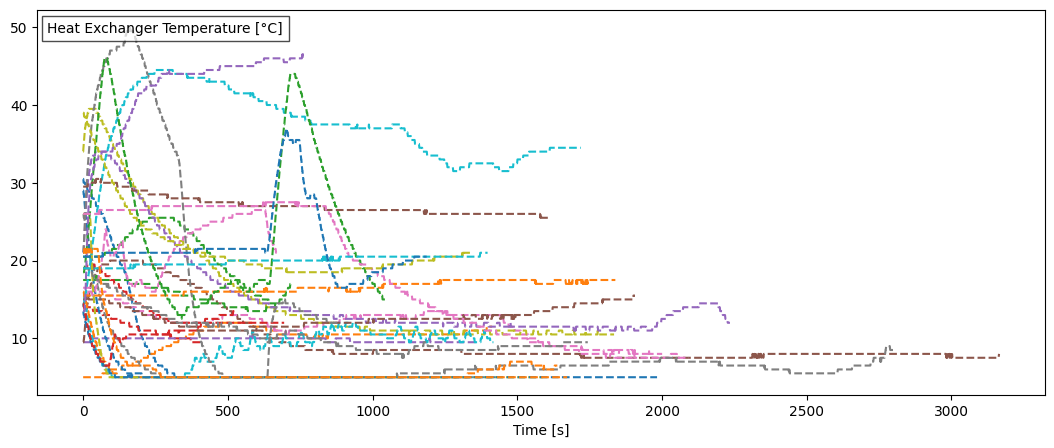

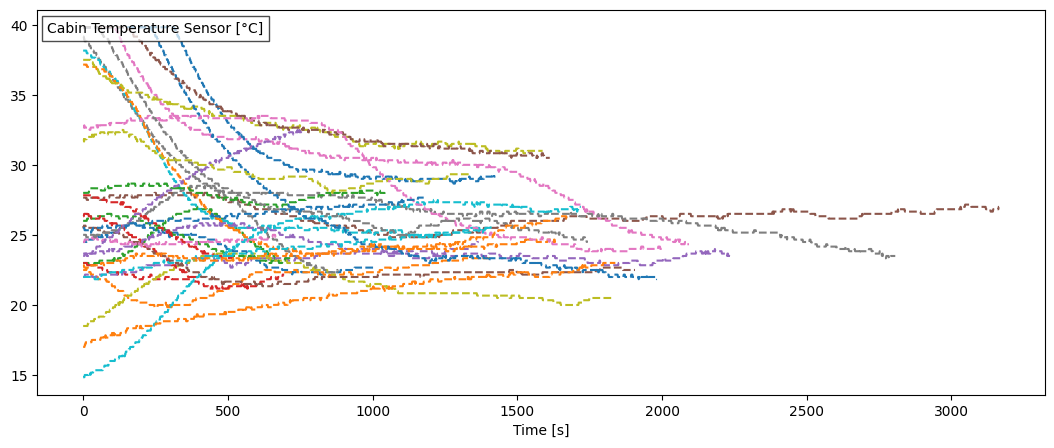

In [10]:
#-Loop through all the properties in the dataframe and display them for the 32 trips summer set
for col in consistent_cols[1:]:    
    fig, ax = plt.subplots(figsize=(13,5))
    for trip in dfSummerTrips:
        trip.plot(x="Time [s]", y=[col], ax=ax, ls="--")
    ax.text(0.01, 0.97, col, transform=ax.transAxes, fontsize=10, va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7))
    ax.legend().set_visible(False)
    plt.show()


The columns: min. SOC [%] and max. SOC [%] don't contain any relevant information for inference. They can be droped.

In [11]:
print(consistent_cols)
#-Drop some more features
consistent_cols.remove("min. SoC [%]")
consistent_cols.remove("max. SoC [%)")
consistent_cols.remove("max. Battery Temperature [°C]")
dfSummerTrips, consistent_cols = conform_datasets(nbOfTrips=32,pathToFiles=pathA,col_list=consistent_cols)

['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]']


# Feature engineering

To use the data for inference we need to find relevant features for the SoC determination at a given time.
Since the SoC is dependent on the cumulative action during the trip, we need to engineer features that reflect that. 

Time stamps in the trip logs are evey 100ms. Let's cumulate some data to make predictions eg. once a minute, based on actions taken during this time window. We would thus need the last SoC value (start of the time window) and the actions taken since the start of the time window to make a prediction for the SoC at the end of the time window. For a good model the time window size can be increased without much reduction in model accuracy.

In [12]:
def prepare_features(df_TripList,stepWidth, dropNan=False):
    #stepWidth = 60*1
    newfeatures = []
    
    for i, trip_df in enumerate(df_TripList):
        
        if dropNan:
            #hasNaN  = trip_df.isnull().values.any()
            #cols    = trip_df.columns[trip_df.isna().any()].tolist()
            #print(cols)
            trip_df = trip_df.dropna()
            #-Clean up the index
            trip_df.index = range(len(trip_df))

        dfLength = len(trip_df.index)
        numRows  = dfLength//stepWidth
        for i in range(0,numRows):
            #-Sum the actions during a given time window (makes no  practical sense to do inference every 100ms in my view)
            averageVals = trip_df.iloc[i*stepWidth:(i+1)*stepWidth].sum() 
            averageVals=averageVals/(1.*stepWidth)
            featureList=averageVals.add_prefix('avrg_', axis=0)
            #-Add elevation change in the time window (absolute elevation values are not useful)
            elevationDiff = trip_df.loc[(i+1)*stepWidth,'Elevation [m]'] - trip_df.loc[i*stepWidth,'Elevation [m]']
            featureList['Elevation change']= elevationDiff 
            #-Add feature values from the start of your inference windows (you want to know how the SOC changes compared to a start value)
            featuresAtBeginningOfWindow = trip_df.loc[i*stepWidth, ['SoC [%]', 'displayed SoC [%]']] 
            featureList["Previous SoC"]           = featuresAtBeginningOfWindow['SoC [%]']
            featureList["Previous displayed SoC"] = featuresAtBeginningOfWindow['displayed SoC [%]']
            #-Add feature values from the end of your inference windows -> These are the values you want to predict!
            featuresAtEndOfWindow = trip_df.loc[(i+1)*stepWidth, ['SoC [%]', 'displayed SoC [%]']] 
            featureList["Next SoC"]           = featuresAtEndOfWindow['SoC [%]']
            featureList["Next displayed SoC"] = featuresAtEndOfWindow['displayed SoC [%]']
            newfeatures.append(featureList)    
    
    newDf = pd.DataFrame(newfeatures)
    newDf = newDf.drop(columns=['avrg_SoC [%]', 'avrg_displayed SoC [%]', 'avrg_Time [s]','avrg_Elevation [m]'])
    
    #-Check for NaN
    hasNaN = newDf.isnull().values.any()
    print(f"Output df has NaN: {hasNaN}")

    return newDf

In [13]:
newDf = prepare_features(dfSummerTrips, stepWidth=60)

Output df has NaN: False


In [14]:
newDf.head()

avrg_Velocity [km/h]  avrg_Throttle [%]  avrg_Motor Torque [Nm]  \
0              1.013167           8.917667               16.189833   
1              5.299333          23.950833               13.746500   
2              8.398333          25.391667               -1.737500   
3              9.401333          34.763500               35.695833   
4             24.248667          41.201667               49.385333   

   avrg_Longitudinal Acceleration [m/s^2]  avrg_Regenerative Braking Signal   \
0                                0.127167                               0.00   
1                                0.150167                               0.00   
2                               -0.156000                               0.15   
3                                0.407167                               0.00   
4                                0.688833                               0.00   

   avrg_Battery Voltage [V]  avrg_Battery Current [A]  \
0                391.261000                 -3.769333   
1                391.166833                 -4.556000   
2                391.269667                 -3.092167   
3                390.525167                -12.083500   
4                388.876833                -28.381333   

   avrg_Battery Temperature [°C]  avrg_Heating Power CAN [kW]  \
0                           21.0                          0.0   
1                           21.0                          0.0   
2                           21.0                          0.0   
3                           21.0                          0.0   
4                           21.0                          0.0   

   avrg_Requested Heating Power [W]  avrg_AirCon Power [kW]  \
0                              85.0                   0.400   
1                              85.0                   0.400   
2                              85.0                   0.417   
3                              85.0                   0.440   
4                              85.0                   0.469   

   avrg_Heater Signal  avrg_Ambient Temperature [°C]  \
0                 1.0                        25.5000   
1                 1.0                        25.5210   
2                 1.0                        25.9965   
3                 1.0                        26.2675   
4                 1.0                        26.5000   

   avrg_Heat Exchanger Temperature [°C]  avrg_Cabin Temperature Sensor [°C]  \
0                             30.087500                           24.500000   
1                             29.587500                           24.560833   
2                             29.170833                           24.665833   
3                             28.754167                           24.670000   
4                             28.491667                           24.670000   

   Elevation change  Previous SoC  Previous displayed SoC  Next SoC  \
0               0.0          86.9                   100.0      86.9   
1               0.0          86.9                   100.0      86.9   
2               0.0          86.9                   100.0      86.9   
3               0.0          86.9                   100.0      86.9   
4               0.0          86.9                   100.0      86.8   

   Next displayed SoC  
0               100.0  
1               100.0  
2               100.0  
3               100.0  
4               100.0

Split and Normalize the features

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def split_TestTrain(df, scaler=None):
    #-First separate features from the target variable
    try:
        X = df.drop(columns=['Next SoC', 'Previous displayed SoC', 'Next displayed SoC'])
    except:
        X = df
    y = df['Next SoC'].to_numpy()

    #-Second split the data into test and train data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #-Third normalize the features for a better fit conversion
    if not scaler:
        scaler = StandardScaler().fit(X)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    return scaler, [X_train_scaled,y_train, X_train.index], [X_test_scaled, y_test,X_test.index]

In [16]:
scalerSummerTrips, train_tuple, test_tuple = split_TestTrain(newDf)
X_train_scaled, y_train, index_train = train_tuple
X_test_scaled,  y_test,  index_test  = test_tuple

# Model Building

## Neural Network

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(1)  # applied to achieve consistent results

def fit_model_NN(X,Y,X_test,y_test):

    #-define the model
    model = Sequential(
    [
        Dense(10, activation='relu', name = 'layer1'),
        Dense(1, activation='relu',  name = 'layer2') #If SoC is predicted the values are always positive between 0-100%, so relu is a good choice
     ])

    loss_object='mean_absolute_error'
    #optimizer   = tf.keras.optimizers.Adam(learning_rate=0.01)
    optimizer_object   = tf.keras.optimizers.legacy.Adam(learning_rate=0.01) # For Apple M1,M2 chips

    #-Compile model
    model.compile(loss = loss_object, optimizer = optimizer_object)
    epochs_hist = model.fit( X ,Y ,epochs=50, validation_data=(X_test,y_test))

    return model, epochs_hist


In [18]:
NN_model, epochs_history = fit_model_NN(X_train_scaled,y_train,X_test_scaled,y_test)

Epoch 1/50
195/195 [==============================] - 1s 3ms/step - loss: 38.1564 - val_loss: 11.0543
Epoch 2/50
195/195 [==============================] - 0s 2ms/step - loss: 7.7208 - val_loss: 5.1389
Epoch 3/50
195/195 [==============================] - 0s 2ms/step - loss: 3.8409 - val_loss: 2.7698
Epoch 4/50
195/195 [==============================] - 0s 2ms/step - loss: 2.1091 - val_loss: 1.5617
Epoch 5/50
195/195 [==============================] - 0s 2ms/step - loss: 1.1471 - val_loss: 0.9303
Epoch 6/50
195/195 [==============================] - 0s 2ms/step - loss: 0.6885 - val_loss: 0.4975
Epoch 7/50
195/195 [==============================] - 0s 2ms/step - loss: 0.4270 - val_loss: 0.3692
Epoch 8/50
195/195 [==============================] - 0s 2ms/step - loss: 0.3790 - val_loss: 0.3116
Epoch 9/50
195/195 [==============================] - 0s 2ms/step - loss: 0.3137 - val_loss: 0.2766
Epoch 10/50
195/195 [==============================] - 0s 2ms/step - loss: 0.2828 - val_loss: 0.33

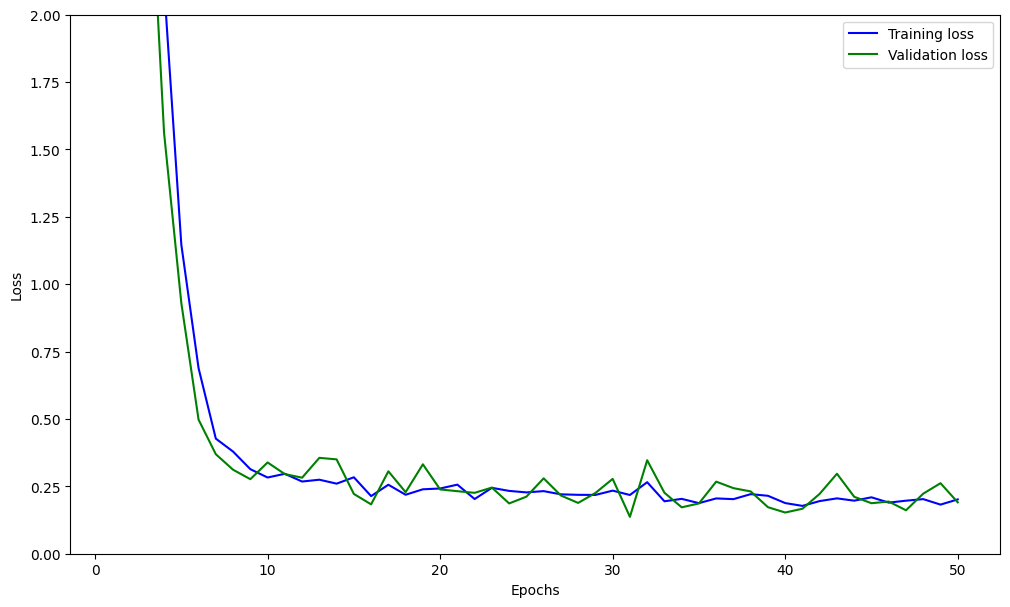

In [19]:
history_dict = epochs_history.history
#print(history_dict.keys())
loss     = history_dict['loss']
val_loss = history_dict['val_loss']
epochs   = range(1, len(loss) + 1)

plt.figure(figsize = (12, 7))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])

plt.legend()
plt.show()

## Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

def fit_model_RndFor(X,Y):
    #-define the model to use
    model = RandomForestRegressor(max_depth=5, random_state=0)
    
    #-Train the model
    model.fit(X, Y)
    
    return model

In [21]:
rnd_forest_model = fit_model_RndFor(X_train_scaled,y_train)

## XGBoost Regressor

In [22]:
import xgboost as xgb
from xgboost import XGBRegressor

def fit_model_XGBoost(X,Y):
    model = XGBRegressor(n_estimators=50, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)
    model.fit(X, Y)
    return model

In [23]:
XGBoost_model = fit_model_XGBoost(X_train_scaled,y_train)

# Model Evaluation

Define model metrics to get insight into their performance

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def calculate_metrics(model, x_train, x_test, y_train, y_test):

    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)
    
    mse_tr  = mean_squared_error(y_train, y_pred_train)
    mae_tr  = mean_absolute_error(y_train, y_pred_train)
    mse_tst = mean_squared_error(y_test, y_pred_test)
    mae_tst = mean_absolute_error(y_test, y_pred_test)
    nb_features = x_train.shape[1]
    
    # Construct a dataframe to display metrics.
    metrics_df = pd.DataFrame([[mse_tr, mae_tr, mse_tst, mae_tst, nb_features]], columns=["MSE Train", "MAE Train","MSE Test", "MAE Test","No. of Features" ])
    
    return metrics_df

In [25]:
metrics_df = calculate_metrics(NN_model, X_train_scaled, X_test_scaled, y_train, y_test)
metrics_df.index = ['Neural Network']
metricSummary_df = metrics_df.copy()

metrics_df = calculate_metrics(rnd_forest_model, X_train_scaled, X_test_scaled, y_train, y_test)
metrics_df.index = ['Random Forest Reg.']
metricSummary_df = pd.concat([metricSummary_df, metrics_df])
#metricSummary_df = metricSummary_df.append(metrics_df)
metrics_df = calculate_metrics(XGBoost_model, X_train_scaled, X_test_scaled, y_train, y_test)
metrics_df.index = ['XGBoost Reg.']
metricSummary_df = pd.concat([metricSummary_df, metrics_df])

metricSummary_df.head(10)

49/49 [==============================] - 0s 1ms/step


MSE Train  MAE Train  MSE Test  MAE Test  No. of Features
Neural Network       0.072166   0.195235  0.067269  0.190670               17
Random Forest Reg.   0.091931   0.234586  0.092041  0.232153               17
XGBoost Reg.         0.077215   0.206959  0.136893  0.258244               17

The mean squared error incroporates both the variance and the bias of the distribution so lets plot the distribution to gain a better understaning of the prediction errors.

In [26]:
y_train_pred_NN = NN_model.predict(X_train_scaled)
y_test_pred_NN  = NN_model.predict(X_test_scaled) 

y_train_pred_RndFor = rnd_forest_model.predict(X_train_scaled)  
y_test_pred_RndFor  = rnd_forest_model.predict(X_test_scaled)  

y_train_pred_XGB = XGBoost_model.predict(X_train_scaled)  
y_test_pred_XGB  = XGBoost_model.predict(X_test_scaled)  

49/49 [==============================] - 0s 1ms/step


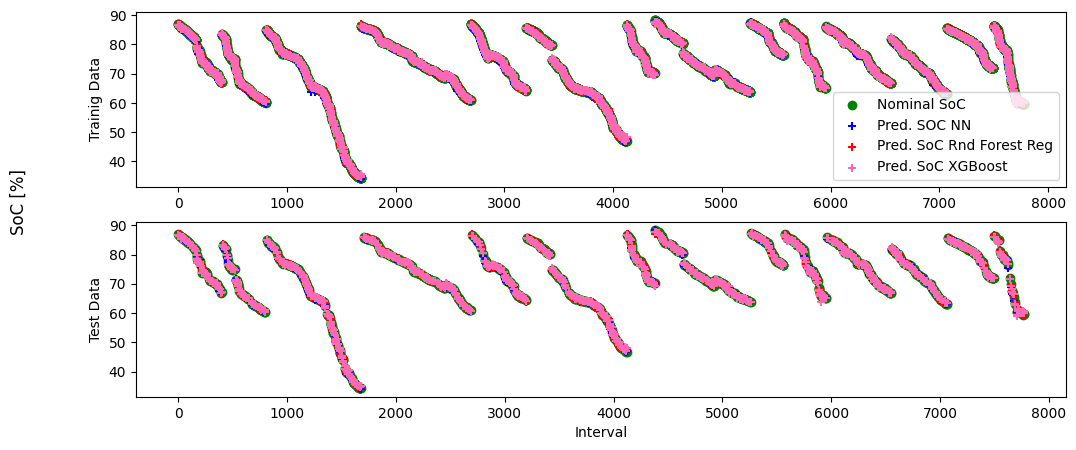

In [27]:
fig, axs = plt.subplots(2, figsize = (12, 5))
markerSize=30
axs[0].scatter(index_train, y_train, c='g')
axs[0].scatter(index_train, y_train_pred_NN, marker="+", c = 'b')
axs[0].scatter(index_train, y_train_pred_RndFor, marker="+", c = 'r')
axs[0].scatter(index_train, y_train_pred_XGB, marker="+", c = 'hotpink')
axs[0].set(ylabel='Trainig Data')
#axs[0].set_xlim([0, 750])

axs[1].scatter(index_test, y_test, c='g')
axs[1].scatter(index_test, y_test_pred_NN, marker="+", c = 'b')
axs[1].scatter(index_test, y_test_pred_RndFor, marker="+", c = 'r')
axs[1].scatter(index_test, y_test_pred_XGB, marker="+", c = 'hotpink')
axs[1].set(ylabel='Test Data')
#axs[1].set_xlim([0, 750])

fig.supylabel('SoC [%]')
plt.xlabel('Interval')
#plt.set(xlabel='Epochs', ylabel='Loss')
axs[0].legend(['Nominal SoC', 'Pred. SOC NN', 'Pred. SoC Rnd Forest Reg','Pred. SoC XGBoost' ])

#plt.legend()
plt.show()

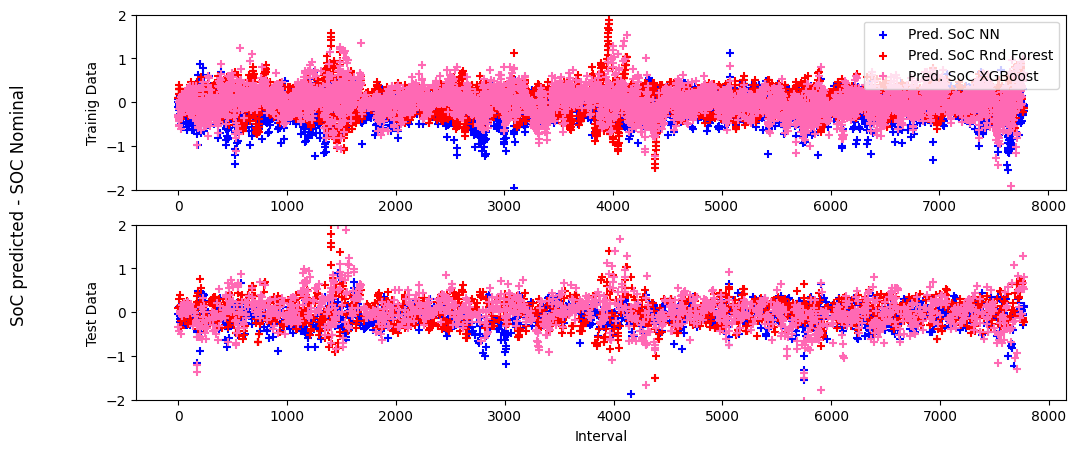

In [28]:
fig, axs = plt.subplots(2, figsize = (12, 5))
markerSize=30
#axs[0].scatter(X_train.index, y_train, c='g')


axs[0].scatter(index_train, np.subtract(y_train_pred_NN[:,0],y_train), marker="+", c = 'b')
axs[0].scatter(index_train, np.subtract(y_train_pred_RndFor,y_train), marker="+", c = 'r')
axs[0].scatter(index_train, np.subtract(y_train_pred_XGB,y_train), marker="+", c = 'hotpink')
axs[0].set(ylabel='Trainig Data')
axs[0].set_ylim([-2, 2])
#axs[0].set_ylim([-0.1, 0.1])

axs[1].scatter(index_test, np.subtract(y_test_pred_NN[:,0],y_test), marker="+", c = 'b')
axs[1].scatter(index_test, np.subtract(y_test_pred_RndFor,y_test), marker="+", c = 'r')
axs[1].scatter(index_test, np.subtract(y_test_pred_XGB,y_test), marker="+", c = 'hotpink')
axs[1].set(ylabel='Test Data')
axs[1].set_ylim([-2, 2])
#axs[1].set_ylim([-0.1, 0.1])

plt.xlabel('Interval')
fig.supylabel('SoC predicted - SOC Nominal')
axs[0].legend(['Pred. SoC NN', 'Pred. SoC Rnd Forest','Pred. SoC XGBoost'])

plt.show()

As visible in the absolute difference between predicted and true SoC, the prediction lies mostly within half a percentage point. This is a pretty good starting point for model tuning. Also important to note is that the given precision of the nominal SoC is just one digit after the decimal point. So this is a natural limit for the possible presicion achievable at best. 

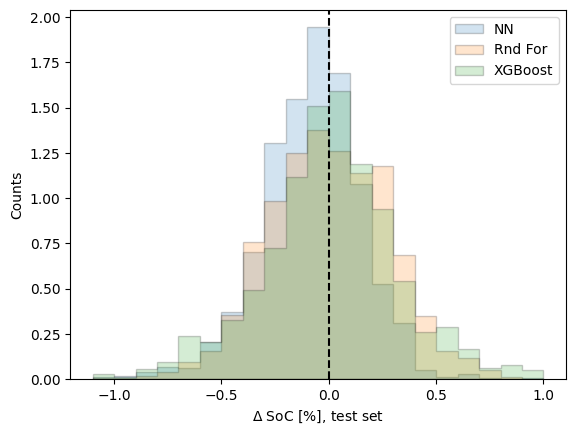

In [29]:
kwargs = dict(histtype='stepfilled', alpha=0.2, density=True, bins=np.arange(-1.1,1.1,0.1), ec="k")

plt.hist(np.subtract(y_test_pred_NN[:,0],y_test), label="NN", **kwargs)
plt.hist(np.subtract(y_test_pred_RndFor,y_test), label="Rnd For",**kwargs)
plt.hist(np.subtract(y_test_pred_XGB,y_test), label="XGBoost", **kwargs)
plt.legend(prop={'size': 10})
plt.axvline(x=0, color="black", linestyle="--")
plt.xlabel('$\\Delta$ SoC [%], test set')
plt.ylabel('Counts')
plt.show()

We see that in its current form the models are well centered around zero.

# Model and Feature Tuning 

Inspect the correlation of the features among each other and among a variation of the target variable (change of SoC during the time window). This will help find features that have the most impact on the change of SoC and also find features that are correlated amongst each other and thus could be dropped.


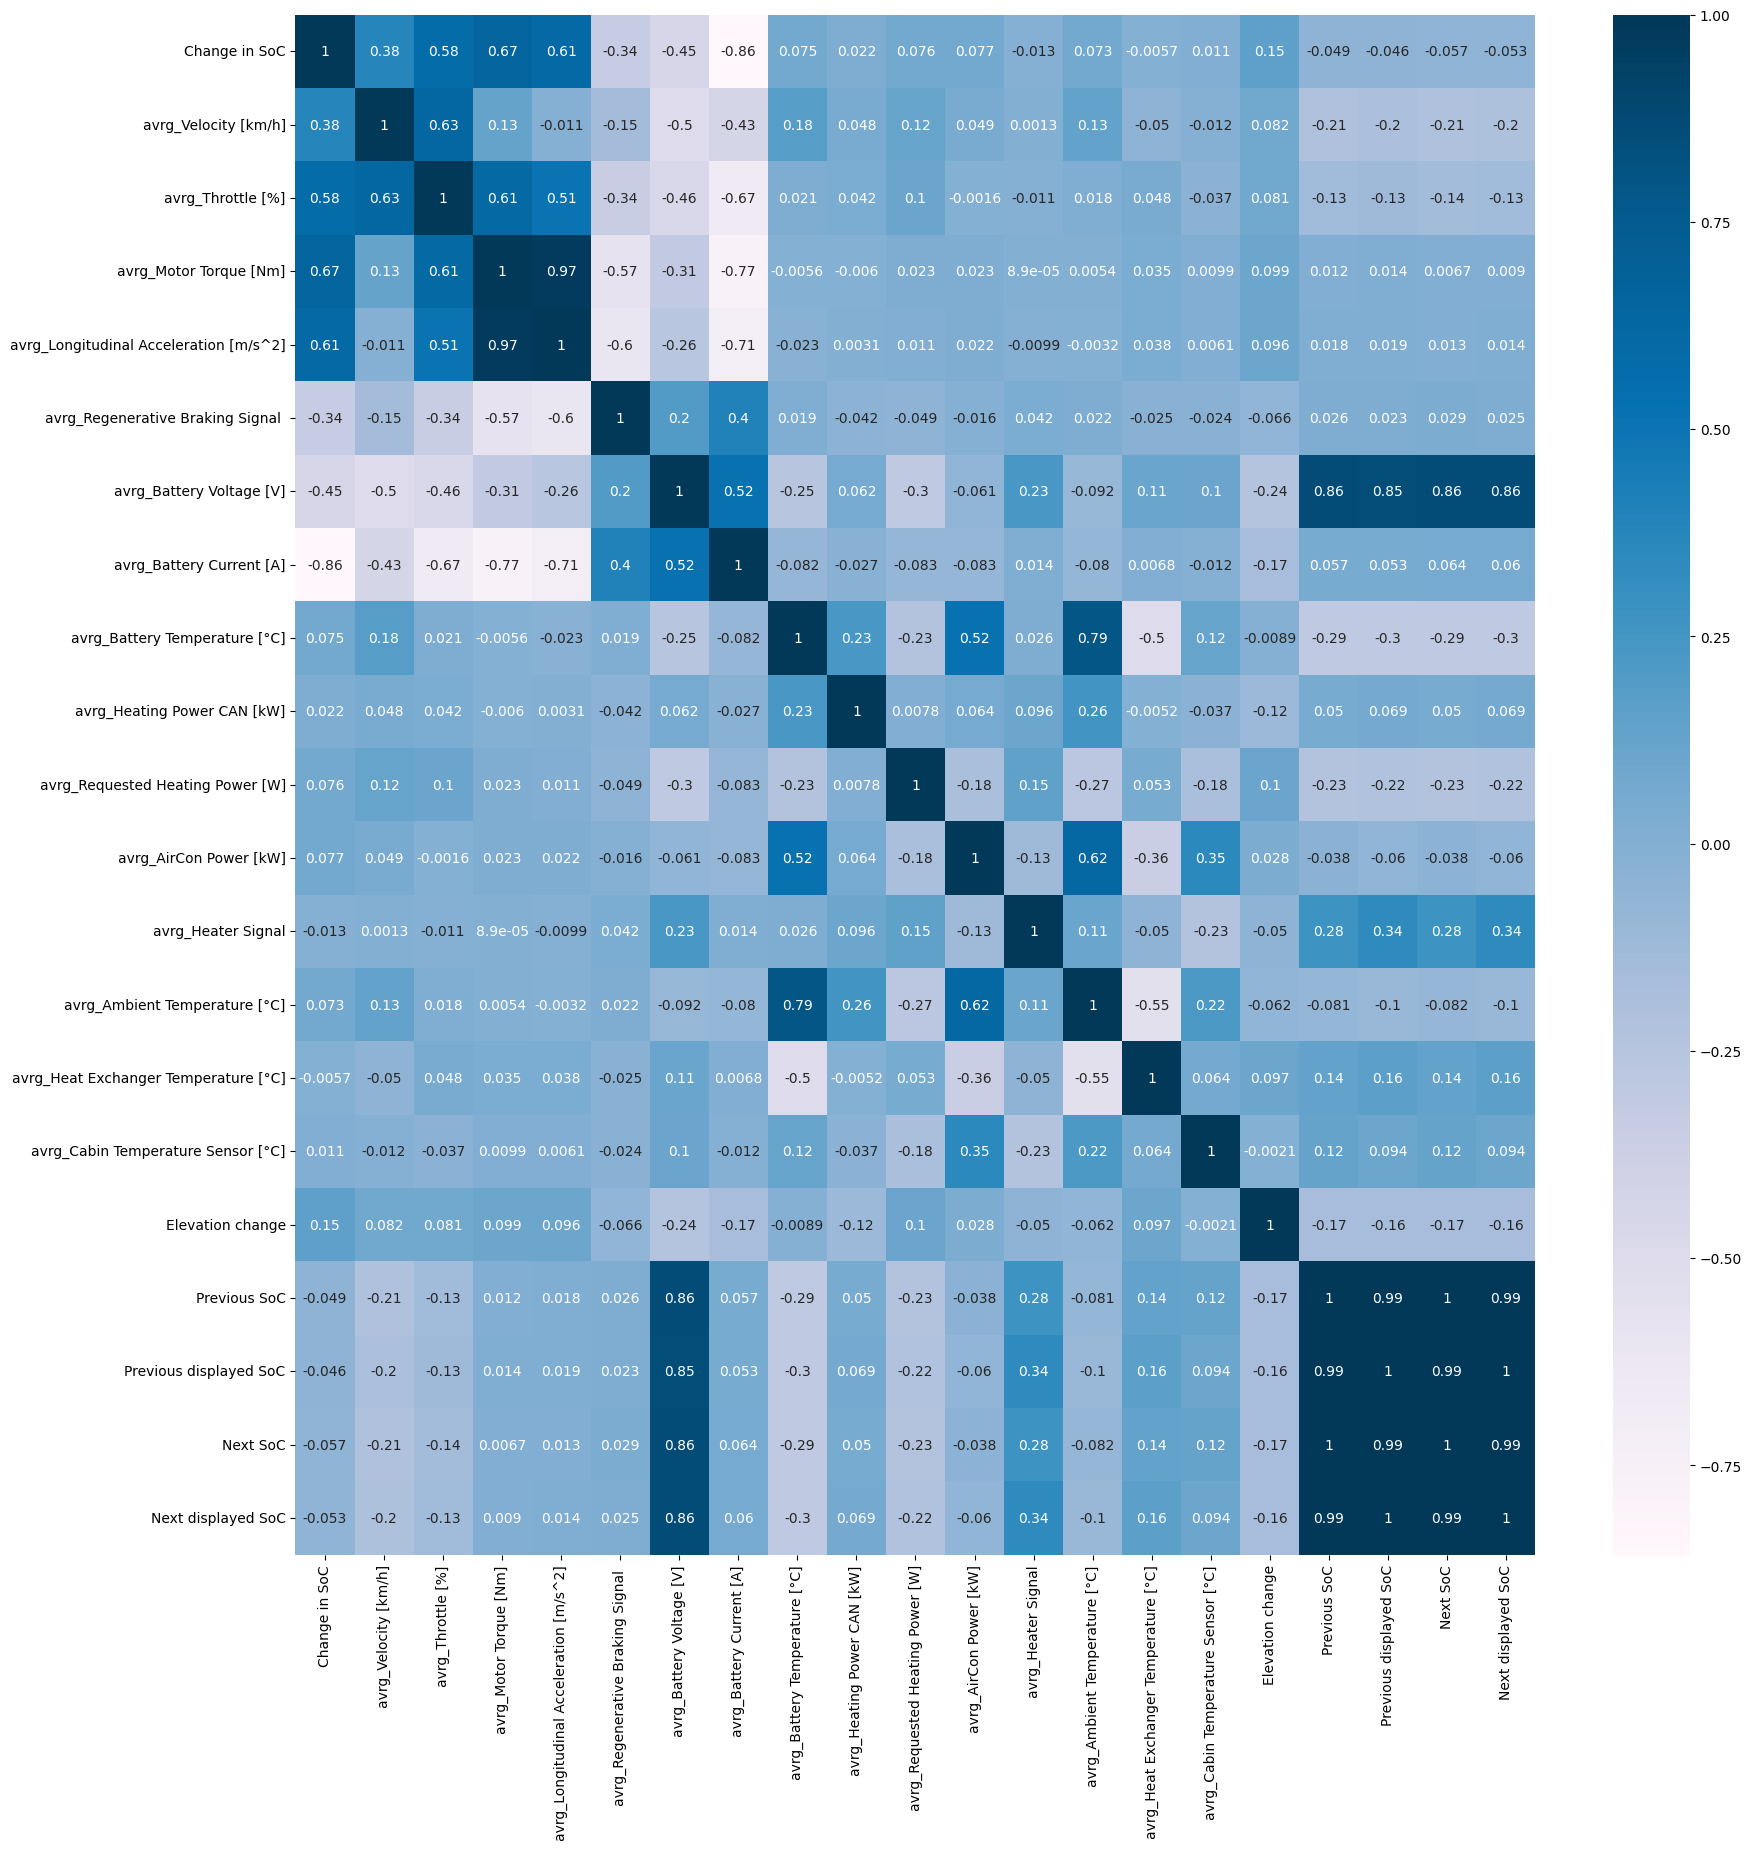

In [30]:
#-Build the feature change of SoC during time window
prev = newDf["Previous SoC"]
next = newDf["Next SoC"]
diff = np.subtract(prev,next)
tuning_df = newDf.copy()

tuning_df.insert(0, "Change in SoC", diff) 

#-Calculate correlation matrix
cor = tuning_df.corr() 

#-Plot the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

#-The first row shows the correlation with the target variable

In [31]:
#-Inspect the correlation with the target variable
cor_target = cor["Change in SoC"]

#-Select highly correlated features (thresold = 0.2)
#-Those features have the most impact on the SoC change 
relevant_features = cor_target[abs(cor_target)>0.2]
#print(relevant_features)

#-Collect the names of the most relevant features
relevant_names = relevant_features.index.tolist() 
print(relevant_names)

#-Add back thr typical target variable for training
relevant_names.remove("Change in SoC")
relevant_names.append("Next SoC")
newDf_relevant = newDf[relevant_names]

['Change in SoC', 'avrg_Velocity [km/h]', 'avrg_Throttle [%]', 'avrg_Motor Torque [Nm]', 'avrg_Longitudinal Acceleration [m/s^2]', 'avrg_Regenerative Braking Signal ', 'avrg_Battery Voltage [V]', 'avrg_Battery Current [A]']


In [32]:
_, train_tuple_relevant, test_tuple_relevant = split_TestTrain(newDf_relevant)
X_train_scaled_relevant, y_train_relevant, index_train = train_tuple_relevant
X_test_scaled_relevant,  y_test_relevant,  index_test  = test_tuple_relevant

In [33]:
NN_model2, epochs_history2 = fit_model_NN(X_train_scaled_relevant,y_train_relevant,X_test_scaled_relevant,y_test_relevant)
rnd_forest_model2 = fit_model_RndFor(X_train_scaled_relevant,y_train_relevant)
XGBoost_model2 = fit_model_XGBoost(X_train_scaled_relevant,y_train_relevant)

Epoch 1/50
195/195 [==============================] - 1s 3ms/step - loss: 46.6083 - val_loss: 16.1245
Epoch 2/50
195/195 [==============================] - 0s 2ms/step - loss: 7.6360 - val_loss: 4.7291
Epoch 3/50
195/195 [==============================] - 0s 2ms/step - loss: 3.6160 - val_loss: 2.0468
Epoch 4/50
195/195 [==============================] - 0s 2ms/step - loss: 1.3448 - val_loss: 0.5268
Epoch 5/50
195/195 [==============================] - 0s 2ms/step - loss: 0.2557 - val_loss: 0.1739
Epoch 6/50
195/195 [==============================] - 0s 2ms/step - loss: 0.1890 - val_loss: 0.1545
Epoch 7/50
195/195 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.2579
Epoch 8/50
195/195 [==============================] - 0s 2ms/step - loss: 0.1252 - val_loss: 0.1521
Epoch 9/50
195/195 [==============================] - 0s 2ms/step - loss: 0.1282 - val_loss: 0.1182
Epoch 10/50
195/195 [==============================] - 0s 2ms/step - loss: 0.1115 - val_loss: 0.16

In [34]:
metrics_df = calculate_metrics(NN_model2, X_train_scaled_relevant, X_test_scaled_relevant, y_train_relevant, y_test_relevant)
metrics_df.index = ['Neural Network']
metricSummary_df = pd.concat([metricSummary_df, metrics_df])
metrics_df = calculate_metrics(rnd_forest_model2, X_train_scaled_relevant, X_test_scaled_relevant, y_train_relevant, y_test_relevant)
metrics_df.index = ['Random Forest Reg.']
metricSummary_df = pd.concat([metricSummary_df, metrics_df])
metrics_df = calculate_metrics(XGBoost_model2, X_train_scaled_relevant, X_test_scaled_relevant, y_train_relevant, y_test_relevant)
metrics_df.index = ['XGBoost Reg.']
metricSummary_df = pd.concat([metricSummary_df, metrics_df])

metricSummary_df.head(10)

49/49 [==============================] - 0s 1ms/step


MSE Train  MAE Train  MSE Test  MAE Test  No. of Features
Neural Network       0.072166   0.195235  0.067269  0.190670               17
Random Forest Reg.   0.091931   0.234586  0.092041  0.232153               17
XGBoost Reg.         0.077215   0.206959  0.136893  0.258244               17
Neural Network       0.044125   0.163081  0.041315  0.157870                8
Random Forest Reg.   0.085814   0.224180  0.083895  0.222474                8
XGBoost Reg.         0.069325   0.192002  0.122420  0.237604                8

Reducing the models only to the most relevant features does improve the performance quality for some models (For the relativley untuned model state and a short inference time).

# Model Generalization Testing

So far we have only trained our model on the summer dataset, the "A-Trips". There is also the winter dataset. Lets see how well the three models generalize for those cases and just do inference on these data

In [35]:
pathB = "/kaggle/input/battery-and-heating-data-in-real-driving-cycles/TripB"
dfWinterTrips, consistent_Wintercols = conform_datasets(nbOfTrips=37,pathToFiles=pathB, col_list=consistent_cols)

In [36]:
#-Special fix for dataset No 38. There the column 'Velocity [km/h]' is saved as 'Velocity [km/h]]]' which messes up the conformity test
dataTrip = pd.read_csv(f"{pathB}38.csv", sep=";", encoding='unicode_escape') 
dataTrip = dataTrip.rename(columns={"Velocity [km/h]]]": "Velocity [km/h]"})
dataTrip = dataTrip[consistent_Wintercols]
dfWinterTrips.append(dataTrip)

In [37]:
#-The winter dataset has some rows with NaN, these need to be droped to continue
df_newWinterTrips = prepare_features(dfWinterTrips, stepWidth=60*1, dropNan=True)

Output df has NaN: False


In [38]:
_, train_tuple_winter, test_tuple_winter = split_TestTrain(df_newWinterTrips, scalerSummerTrips)
X_train_scaled_winter, y_train_winter, index_train_winter = train_tuple_winter
X_test_scaled_winter,  y_test_winter,  index_test_winter  = test_tuple_winter

In [39]:
y_train_pred_NN_winter = NN_model.predict(X_train_scaled_winter) 
y_test_pred_NN_winter  = NN_model.predict(X_test_scaled_winter)  

y_train_pred_RndFor_winter = rnd_forest_model.predict(X_train_scaled_winter)  
y_test_pred_RndFor_winter  = rnd_forest_model.predict(X_test_scaled_winter)  

y_train_pred_XGB_winter = XGBoost_model.predict(X_train_scaled_winter)  
y_test_pred_XGB_winter  = XGBoost_model.predict(X_test_scaled_winter)

62/62 [==============================] - 0s 1ms/step


In [40]:
metrics_df = calculate_metrics(NN_model, X_train_scaled_winter, X_test_scaled_winter, y_train_winter, y_test_winter)
metrics_df.index = ['Neural Network Winter Data']
metricSummary_df = pd.concat([metricSummary_df, metrics_df])
metrics_df = calculate_metrics(rnd_forest_model, X_train_scaled_winter, X_test_scaled_winter, y_train_winter, y_test_winter)
metrics_df.index = ['Random Forest Reg. Winter Data']
metricSummary_df = pd.concat([metricSummary_df, metrics_df])
metrics_df = calculate_metrics(XGBoost_model, X_train_scaled_winter, X_test_scaled_winter, y_train_winter, y_test_winter)
metrics_df.index = ['XGBoost Reg. Winter Data']
metricSummary_df = pd.concat([metricSummary_df, metrics_df])

metricSummary_df.head(10)

62/62 [==============================] - 0s 1ms/step


MSE Train  MAE Train    MSE Test   MAE Test  \
Neural Network                    0.072166   0.195235    0.067269   0.190670   
Random Forest Reg.                0.091931   0.234586    0.092041   0.232153   
XGBoost Reg.                      0.077215   0.206959    0.136893   0.258244   
Neural Network                    0.044125   0.163081    0.041315   0.157870   
Random Forest Reg.                0.085814   0.224180    0.083895   0.222474   
XGBoost Reg.                      0.069325   0.192002    0.122420   0.237604   
Neural Network Winter Data      172.259080  10.156285  166.803813  10.020406   
Random Forest Reg. Winter Data    8.986754   1.160197    8.016872   1.104662   
XGBoost Reg. Winter Data         23.501100   2.558690   22.174258   2.521318   

                                No. of Features  
Neural Network                               17  
Random Forest Reg.                           17  
XGBoost Reg.                                 17  
Neural Network                                8  
Random Forest Reg.                            8  
XGBoost Reg.                                  8  
Neural Network Winter Data                   17  
Random Forest Reg. Winter Data               17  
XGBoost Reg. Winter Data                     17

The inference performance on the winter dataset is not as effective as it is with the summer dataset. This suggests that the winter dataset likely includes certain properties or trip behaviors that are absent in the summer dataset. Let's inspect that further.

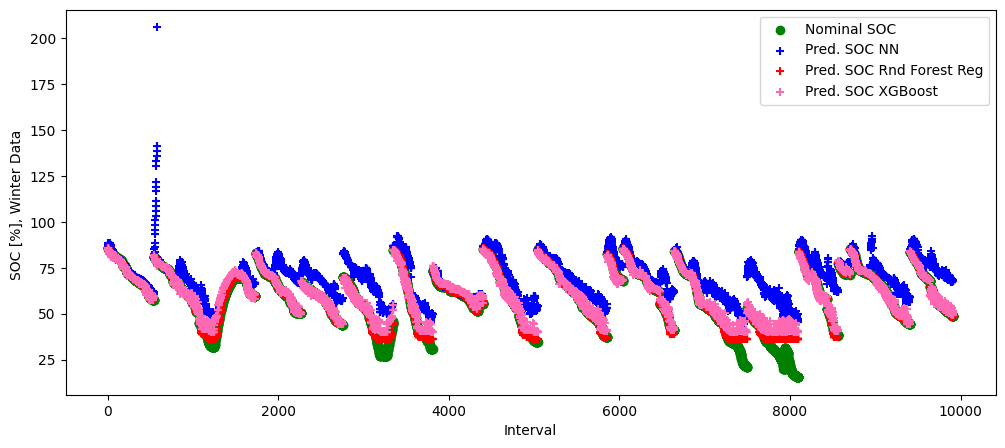

In [41]:
np.append(y_train_winter,y_test_winter)
np.append(y_train_pred_NN_winter,y_test_pred_NN_winter)
np.append(y_train_pred_RndFor_winter,y_test_pred_RndFor_winter)
np.append(y_train_pred_XGB_winter,y_test_pred_XGB_winter)

plt.figure(figsize = (12, 5))
plt.scatter(index_train_winter, y_train_winter, c='g')
plt.scatter(index_train_winter, y_train_pred_NN_winter, marker="+", c = 'b')
plt.scatter(index_train_winter, y_train_pred_RndFor_winter, marker="+", c = 'r')
plt.scatter(index_train_winter, y_train_pred_XGB_winter, marker="+", c = 'hotpink')
plt.ylabel('SOC [%], Winter Data ')
plt.xlabel('Interval')
plt.legend(['Nominal SOC', 'Pred. SOC NN', 'Pred. SOC Rnd Forest Reg','Pred. SOC XGBoost' ])
plt.show()

The comparision of the prediction with the nominal values shows that inference works well up to SoC of about 35%. This is where the lowest SoC for the summer trips were. So the model does not generalize well outside of the SoC range for which it was trained. At this point one would need to retrain the model with the larger SoC depletion from the winter dataset. Nevertheless, above 35% the models work still well for the winter trips.

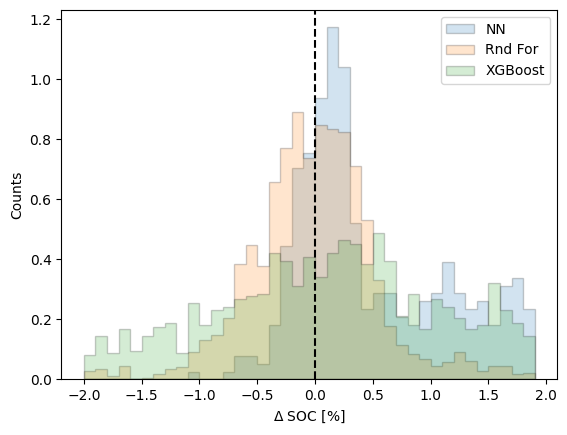

In [42]:
kwargs = dict(histtype='stepfilled', alpha=0.2, density=True, bins=np.arange(-2,2,0.1), ec="k")

plt.hist(np.subtract(y_test_pred_NN_winter[:,0],y_test_winter), label="NN", **kwargs)
plt.hist(np.subtract(y_test_pred_RndFor_winter,y_test_winter), label="Rnd For",**kwargs)
plt.hist(np.subtract(y_test_pred_XGB_winter,y_test_winter), label="XGBoost", **kwargs)
plt.legend(prop={'size': 10})
plt.axvline(x=0, color="black", linestyle="--")
plt.xlabel('$\\Delta$ SOC [%]')
plt.ylabel('Counts')
plt.show()



As expected the width of the delta SoC distribution is wider as it was for the summer dataset.

# Concluding remarks

The inference, given these data, works pretty well but there are certainly some caveates.
1. The given presicion of the SoC in the data given the 100ms sample window could be improved. These two do not match well with their presicion
2. Most of the summer trips the models were trained on do not last longer than 20mins. So the robustness of these models for larger time windows of inference can not be tested well with these data.

From here on further:
1. One can now tune the hyperparameters of the models (regularization, max depth. etc)
2. One can further tune the number of intput features with some more advanced methods like eg. Recursive Feature Elimination
3. One can remove correlated input features like eg. 'Motor Torque [Nm]' and 'Longitudinal Acceleration [m/s^2]' (see correlation plot)
4. One should inspect how the features that were removed due to conformity issues impact the prediction result. Then one could alternativley remove the complete trip which misses the feature from the total dataset rather than the missing column from all datasets.
5. One can train and test the inference for larger time windows (stepWidth parameter in prepare_features()). **Note** : works also well for 5mins inference time windows. But the larger the infrence window the less training samples are available for training. So one can not compare the performance easily one-to-one.